# **Proyecto: Análisis del arbolado en CABA**

- **Service Owner:** Daisy Paredes
- **Profesora:** Alessandra Godoy
- **Integrantes:** Jorge García y Florencia Urquiza

En los últimos años el Gobierno de CABA implementó un exhaustivo registro del arbolado en la Ciudad de Buenos Aires. El relevamiento permitió generar una gran cantidad de datos que nosotros analizaremos en este proyecto. 

En CABA hay aproximadamente 372.699 árboles según los datos obtenidos en Data Buenos Aires.
La variedad de especies que hay en la Ciudad es enorme, pero no mucha gente sabe cuáles son y cómo se separan, por origen (exótico o nativo), entre otras clasificaciones.

## Objetivo

Visualizar la diversidad de árboles que se encuentran repartidos en la Ciudad Autónoma de Buenos Aires, Argentina.
Analizando el dataset obtenido en Data Buenos Aires: https://data.buenosaires.gob.ar/dataset/

## Importación de librerias


In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Análisis Exploratorio de Datos

### Carga del dataset
Cargamos el dataset con Pandas. Imprimimos cuántas filas y columnas tiene, y sus cinco primeros registros.

In [216]:
data_arbolado = pd.read_csv("./datos/arbolado-publico-lineal.csv")
print(f"El dataset tiene {data_arbolado.shape[0]} filas y {data_arbolado.shape[1]} columnas.")
duplicados = len(data_arbolado) - len(data_arbolado.drop_duplicates())
print(f"Duplicados: {duplicados}")
data_arbolado.head()

El dataset tiene 372699 filas y 20 columnas.
Duplicados: 0


,long,lat,tipo_sitio,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_fam,nombre_gen,nombre_cie,nombre_com,tipo_folla,origen,codigo_man,barrio,comuna,calle,chapa1,chapa2
0,-58.389059,-34.620026,Árbol,2430,7,20,17,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1609,0
1,-58.389211,-34.620034,Árbol,2431,8,33,16,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1617,0
2,-58.389269,-34.620037,Árbol,2432,2,3,0,9,Oleáceas,Ligustrum,Ligustrum lucidum,Ligustro,Árbol Latifoliado Perenne,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1629,0
3,-58.389525,-34.620052,Árbol,2433,9,17,0,7,Aceráceas,Acer,Acer negundo,Arce negundo,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",0,0
4,-58.389608,-34.620057,Árbol,2434,6,13,14,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1655,0


Removemos algunas columnas que no vamos a utilizar para una mejor visualización:
- **lat y long**: Ambas columnas no me aportan información para el trabajo, para trabajar con la ubicación de los árboles utilizaremos las columnas **barrio** y **comuna**.
- **chapa1 y chapa2**: Dichas columnas no me aportan información que vaya a utilizar. Se refiere al número de la chapa del frente en donde se encuentra el árbol
- **id_especie y id_arbol**: Dichas columnas no aportan información que vaya a utilizar.
- **codigo_man**: Sucede exactamente lo mismo que con  **lat y long**. Se refiere al código de la manzana en la que está ubicado el árbol
- **tipo_sitio**:  No utilizaré esta columna ya que toma un único valor (Árbol) con lo cual no aporta información alguna.
- **calle**:  No utilizaré esta columna ya que vamos a usar el barrio y la comuna.
- **nombre_cie**:  Usaremos el nombre común de los árboles.

In [217]:
data_arbolado = data_arbolado.drop(['long', 'lat', 'chapa1', 'chapa2', 'id_especie', 'id_arbol', 'codigo_man', 'tipo_sitio', 'calle', 'nombre_cie'], axis=1) 
print(f"El dataset tiene {data_arbolado.shape[0]} filas y {data_arbolado.shape[1]} columnas.")
data_arbolado = data_arbolado.rename({"altura_tot": "altura", "inclinacio":"inclinacion", "tipo_folla":"tipo_follaje"}, axis =1)
data_arbolado.head()

El dataset tiene 372699 filas y 10 columnas.


,altura,diametro,inclinacion,nombre_fam,nombre_gen,nombre_com,tipo_follaje,origen,barrio,comuna
0,7,20,17,Oleáceas,Fraxinus,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION,1
1,8,33,16,Oleáceas,Fraxinus,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION,1
2,2,3,0,Oleáceas,Ligustrum,Ligustro,Árbol Latifoliado Perenne,Exótico,CONSTITUCION,1
3,9,17,0,Aceráceas,Acer,Arce negundo,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION,1
4,6,13,14,Oleáceas,Fraxinus,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION,1


In [218]:
data_arbolado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372699 entries, 0 to 372698
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   altura        372699 non-null  int64 
 1   diametro      372699 non-null  int64 
 2   inclinacion   372699 non-null  int64 
 3   nombre_fam    372699 non-null  object
 4   nombre_gen    372699 non-null  object
 5   nombre_com    372694 non-null  object
 6   tipo_follaje  372699 non-null  object
 7   origen        372699 non-null  object
 8   barrio        372699 non-null  object
 9   comuna        372699 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 28.4+ MB


- Valores faltantes por columna

In [219]:
print("Los valores faltantes en cada columna son: ")
print("---------------------------------------------------------------------------")
print(data_arbolado.isna().sum())
print("---------------------------------------------------------------------------")

Los valores faltantes en cada columna son: 
---------------------------------------------------------------------------
altura          0
diametro        0
inclinacion     0
nombre_fam      0
nombre_gen      0
nombre_com      5
tipo_follaje    0
origen          0
barrio          0
comuna          0
dtype: int64
---------------------------------------------------------------------------


- Estadísticas de las columnas númericas

In [220]:
data_arbolado.describe()

,altura,diametro,inclinacion,comuna
count,372699.000000,372699.000000,372699.000000,372699.000000
mean,8.473044,31.941234,3.069783,9.124524
std,4.576818,20.207216,6.029910,3.866483
min,0.000000,0.000000,0.000000,1.000000
25%,5.000000,17.000000,0.000000,6.000000
50%,8.000000,28.000000,0.000000,10.000000
75%,11.000000,43.000000,5.000000,12.000000
max,60.000000,426.000000,60.000000,15.000000


Veamos como se distribuye la altura y el diametro:

<AxesSubplot: ylabel='altura'>

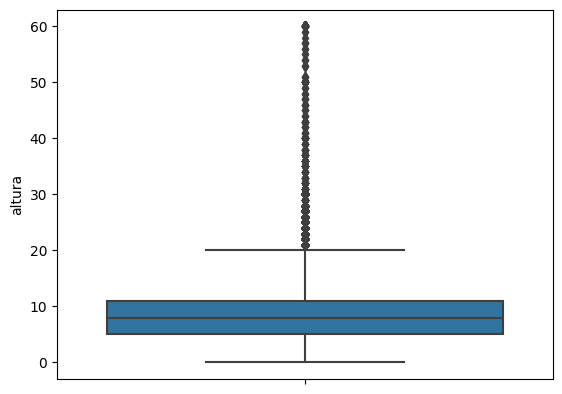

In [221]:
sns.boxplot(data = data_arbolado, y = "altura")

<AxesSubplot: ylabel='diametro'>

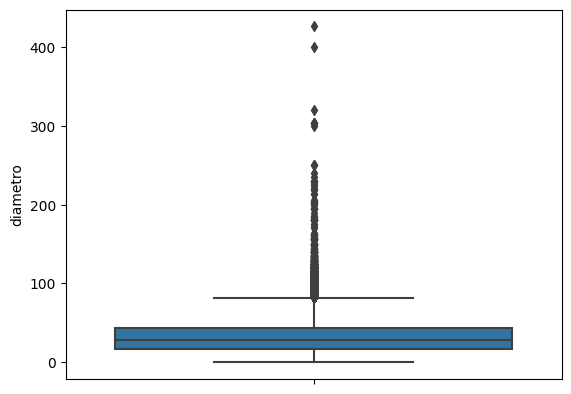

In [222]:
sns.boxplot(data = data_arbolado, y = "diametro")

Veamos cuantos árboles tienen altura y diametro cero:

In [223]:
data_err = data_arbolado[(data_arbolado.altura == 0) & (data_arbolado.diametro == 0)]
data_err

,altura,diametro,inclinacion,nombre_fam,nombre_gen,nombre_com,tipo_follaje,origen,barrio,comuna
4017,0,0,0,No identificada,No identificado,No Determinable,No Determinado,No Determinado,RECOLETA,2
12270,0,0,0,No identificada,No identificado,No Determinable,No Determinado,No Determinado,RECOLETA,2
16191,0,0,0,No identificada,No identificado,No Determinable,No Determinado,No Determinado,SAN CRISTOBAL,3
18154,0,0,0,No identificada,No identificado,No Determinable,No Determinado,No Determinado,ALMAGRO,5
18196,0,0,0,No identificada,No identificado,No Determinable,No Determinado,No Determinado,ALMAGRO,5
...,...,...,...,...,...,...,...,...,...,...
89174,0,0,0,No identificada,No identificado,No Determinable,No Determinado,No Determinado,SAAVEDRA,12
91336,0,0,0,No identificada,No identificado,No Determinable,No Determinado,No Determinado,VILLA URQUIZA,12
92840,0,0,0,Aceráceas,Acer,Arce negundo,Árbol Latifoliado Caducifolio,Exótico,PARQUE AVELLANEDA,9
95675,0,0,0,No identificada,No identificado,No Determinable,No Determinado,No Determinado,VILLA ORTUZAR,15


Aquí se observa que hay un error en el ingreso de los datos, ya que se trata de árboles sin identifiación de ningún tipo y con altura y diametro cero que es imposible.

Al ver que se tratan de tan solo 79 instancias las eliminaré, ya que se trata de un error de ingreso de los datos.

In [224]:
# Obtengo una lista con los índices de las instancias que contienen dicho error.
indices_errores = list(data_err.index.values.tolist()) 
# Extraemos del dataset dichas instancias.
data_arbolado = data_arbolado.drop(indices_errores)
print(f"El dataset ahora tiene {data_arbolado.shape[0]} filas y {data_arbolado.shape[1]} columnas.")

El dataset ahora tiene 372620 filas y 10 columnas.


In [225]:
data_arbolado

,altura,diametro,inclinacion,nombre_fam,nombre_gen,nombre_com,tipo_follaje,origen,barrio,comuna
0,7,20,17,Oleáceas,Fraxinus,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION,1
1,8,33,16,Oleáceas,Fraxinus,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION,1
2,2,3,0,Oleáceas,Ligustrum,Ligustro,Árbol Latifoliado Perenne,Exótico,CONSTITUCION,1
3,9,17,0,Aceráceas,Acer,Arce negundo,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION,1
4,6,13,14,Oleáceas,Fraxinus,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION,1
...,...,...,...,...,...,...,...,...,...,...
372694,10,52,5,Meliáceas,Melia,Paraíso,Árbol Latifoliado Caducifolio,Exótico,FLORESTA,10
372695,11,60,10,Meliáceas,Melia,Paraíso,Árbol Latifoliado Caducifolio,Exótico,FLORESTA,10
372696,10,56,20,Meliáceas,Melia,Paraíso,Árbol Latifoliado Caducifolio,Exótico,FLORESTA,10
372697,10,58,0,Meliáceas,Melia,Paraíso,Árbol Latifoliado Caducifolio,Exótico,FLORESTA,10


# Distribución de las alturas y los diámetros

<AxesSubplot: ylabel='altura'>

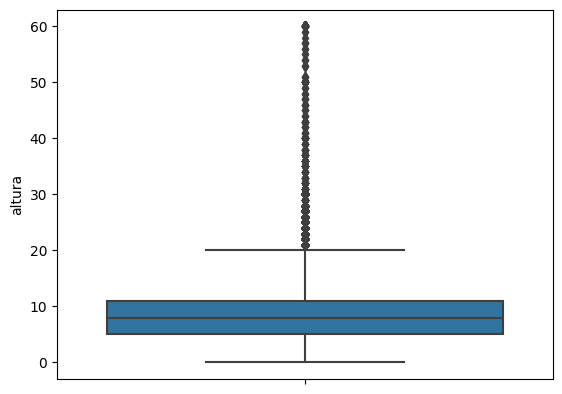

In [226]:
sns.boxplot(data = data_arbolado, y = "altura")

<AxesSubplot: xlabel='altura', ylabel='Count'>

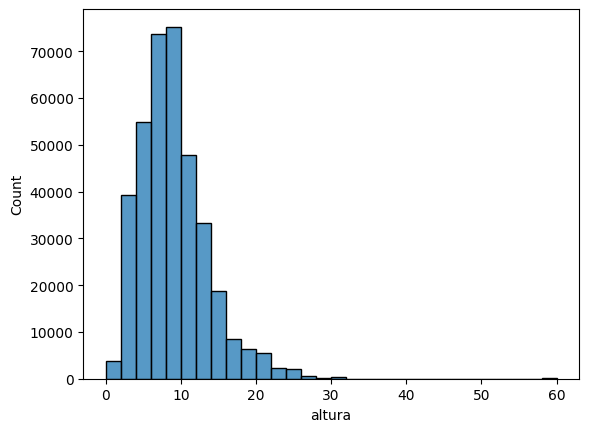

In [227]:
sns.histplot(data=data_arbolado, x="altura", binwidth=2) 

<AxesSubplot: ylabel='diametro'>

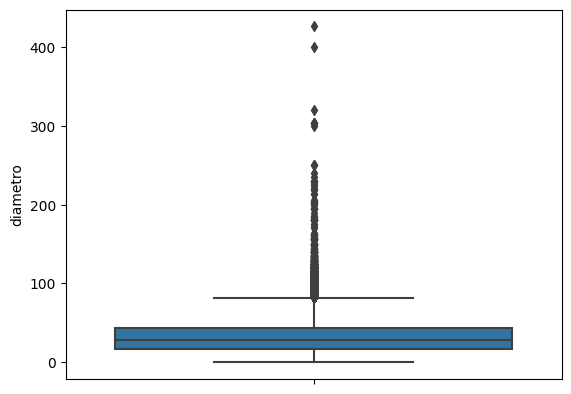

In [228]:
sns.boxplot(data = data_arbolado, y = "diametro")

<AxesSubplot: xlabel='diametro', ylabel='Count'>

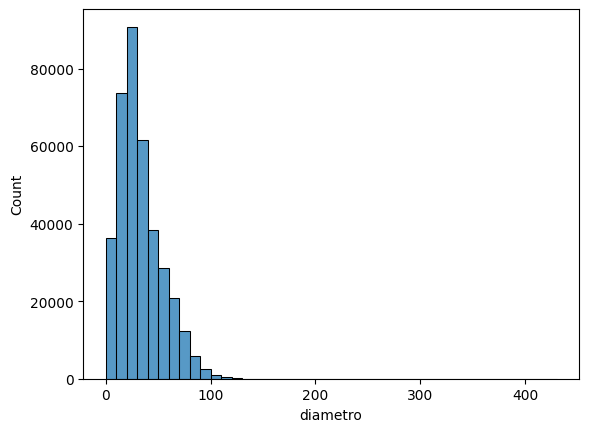

In [229]:
sns.histplot(data=data_arbolado, x="diametro", binwidth=10) 

# Tipos de follajes

Los tipos de follajes y sus cantidades de son: 
---------------------------------------------------------------------------
Árbol Latifoliado Caducifolio    296869
Árbol Latifoliado Perenne         56058
No Determinado                    12701
Palmera                            2908
Árbol Conífero Perenne             1431
Arbusto Perenne                    1246
Arbusto o Herbacea                  837
Arbusto Caducifolio                 476
Árbol Conífero Caducifolio           90
Miscelaneo                            4
Name: tipo_follaje, dtype: int64
---------------------------------------------------------------------------


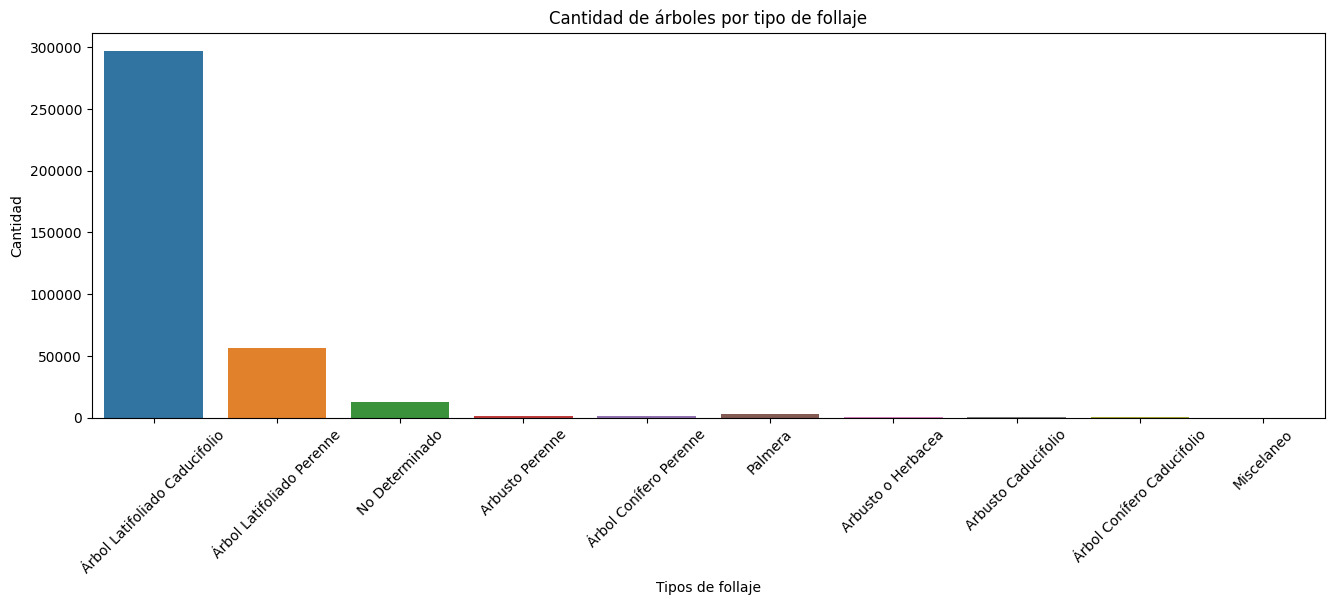

In [230]:
print("Los tipos de follajes y sus cantidades de son: ")
print("---------------------------------------------------------------------------")
print(data_arbolado.tipo_follaje.value_counts())
print("---------------------------------------------------------------------------")

plt.figure(figsize = (35,5))
plt.subplot(1,2,1)
sns.countplot(data = data_arbolado, x = "tipo_follaje")
plt.xticks(rotation = 45)
plt.ylabel("Cantidad")
plt.xlabel("Tipos de follaje")
plt.title("Cantidad de árboles por tipo de follaje")

plt.show()

In [231]:
barrio_df = data_arbolado.groupby(['barrio']).size().to_frame(name = 'Cantidad').reset_index()
barrio_df.sort_values(by='Cantidad', ascending=False, inplace=True)
barrio_df

,barrio,Cantidad
23,PALERMO,22483
18,MATADEROS,18289
40,VILLA DEVOTO,17537
7,CABALLITO,15650
15,FLORES,15275
50,VILLA URQUIZA,14492
4,BELGRANO,13991
42,VILLA LUGANO,13863
32,SAAVEDRA,11064
17,LINIERS,10597


# Árboles por Barrio

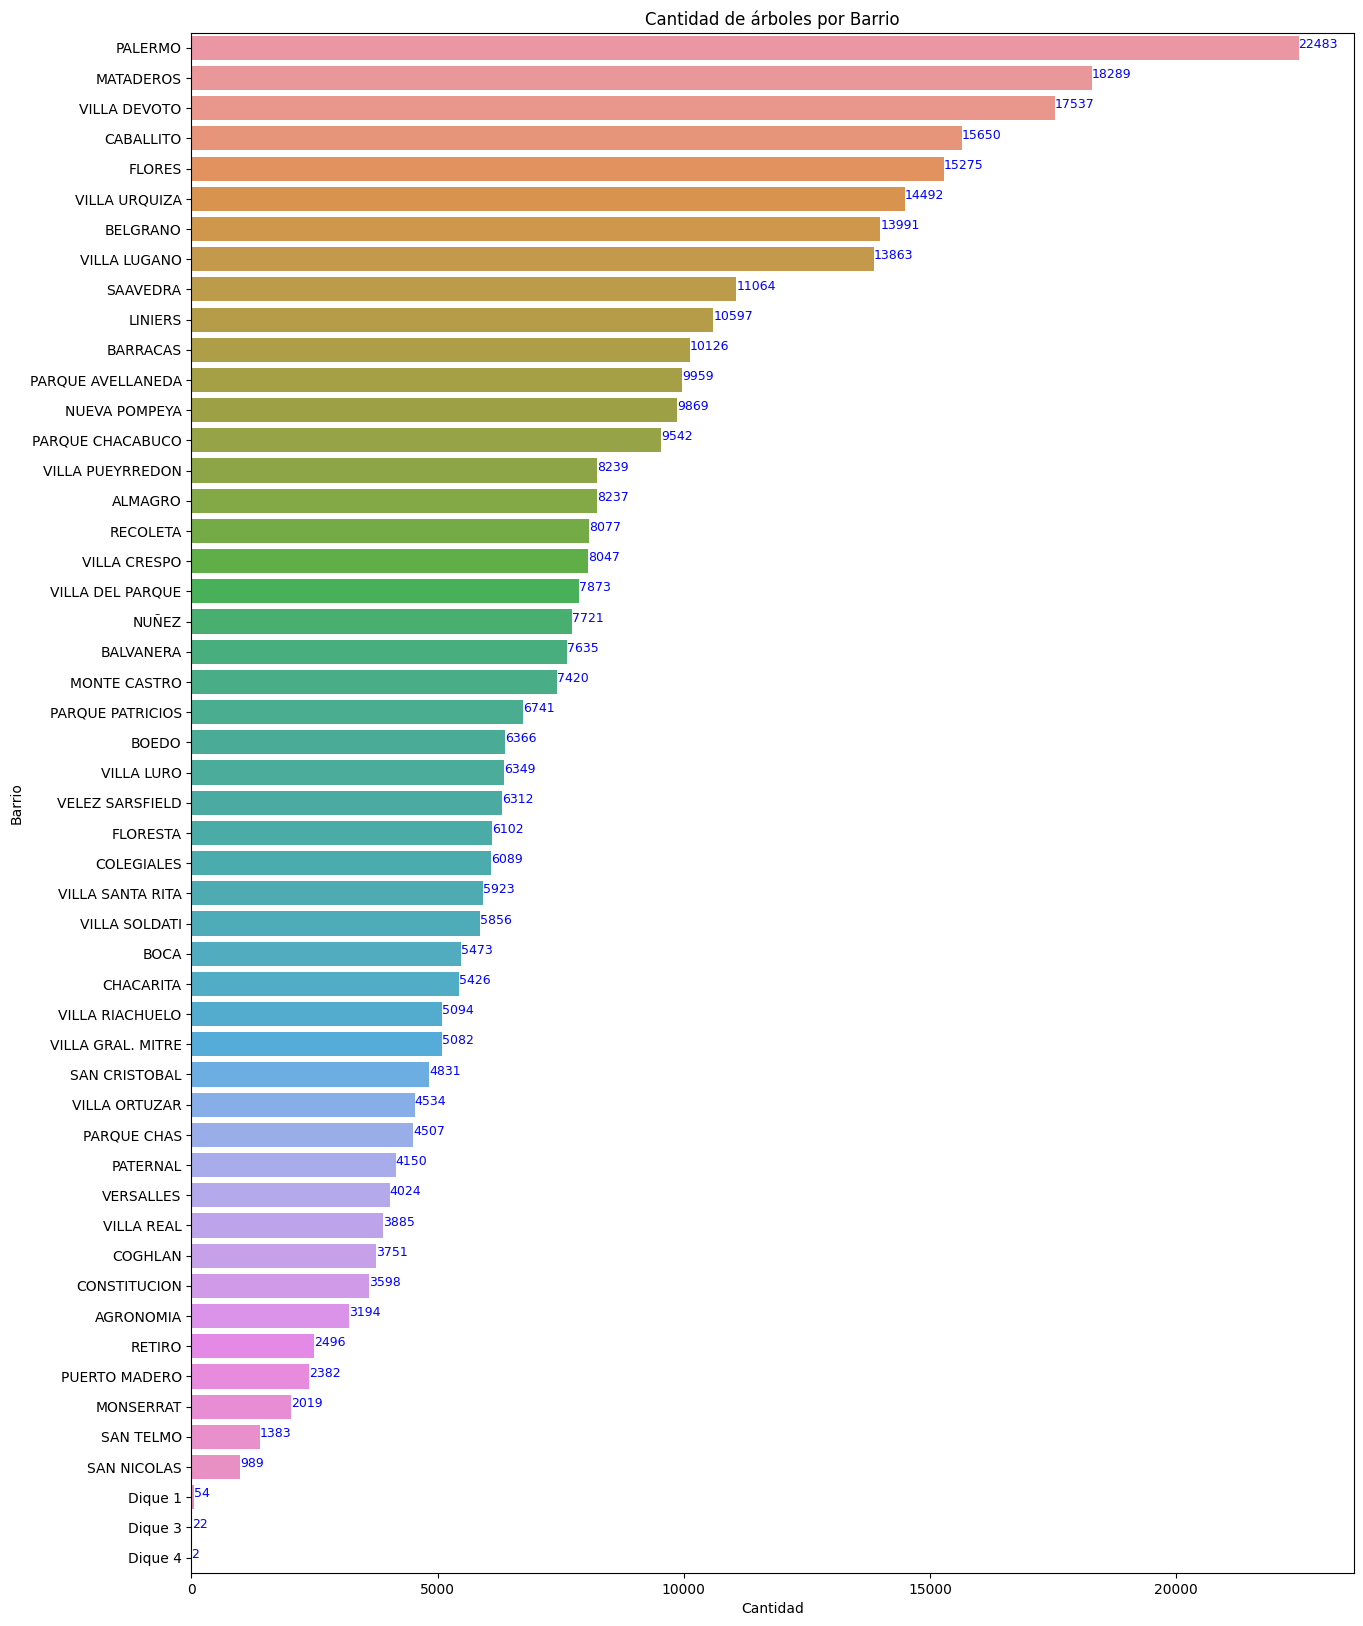

In [232]:
barrio_df = data_arbolado.groupby(['barrio']).size().to_frame(name = 'Cantidad').reset_index()
barrio_df.sort_values(by='Cantidad', ascending=False, inplace=True)
barrio_df.reset_index(drop=True, inplace=True)

fig, ax1 = plt.subplots()
fig.set_size_inches(15, 20)

grafico = sns.barplot(data = barrio_df, y="barrio", x="Cantidad",  ax=ax1, dodge=False)

for index, row in barrio_df.iterrows():
    grafico.text(row.Cantidad, row.name, row.Cantidad, color='blue',fontsize=9)
barrio_df

grafico.set(xlabel='Cantidad', ylabel='Barrio', title='Cantidad de árboles por Barrio')
plt.show()

In [233]:
nombre_com = data_arbolado.groupby(['nombre_com']).size().to_frame(name = 'Cantidad').reset_index()
nombre_com.sort_values(by='Cantidad', ascending=False, inplace=True)
nombre_com

,nombre_com,Cantidad
136,Fresno americano,141820
243,Plátano,34786
226,Paraíso,24555
128,Ficus,24074
278,Tilo,17477
...,...,...
45,Aruera,1
162,Lapacho negro,1
90,Ciprés funerario,1
240,Pino rodeno,1


# Árboles por origen

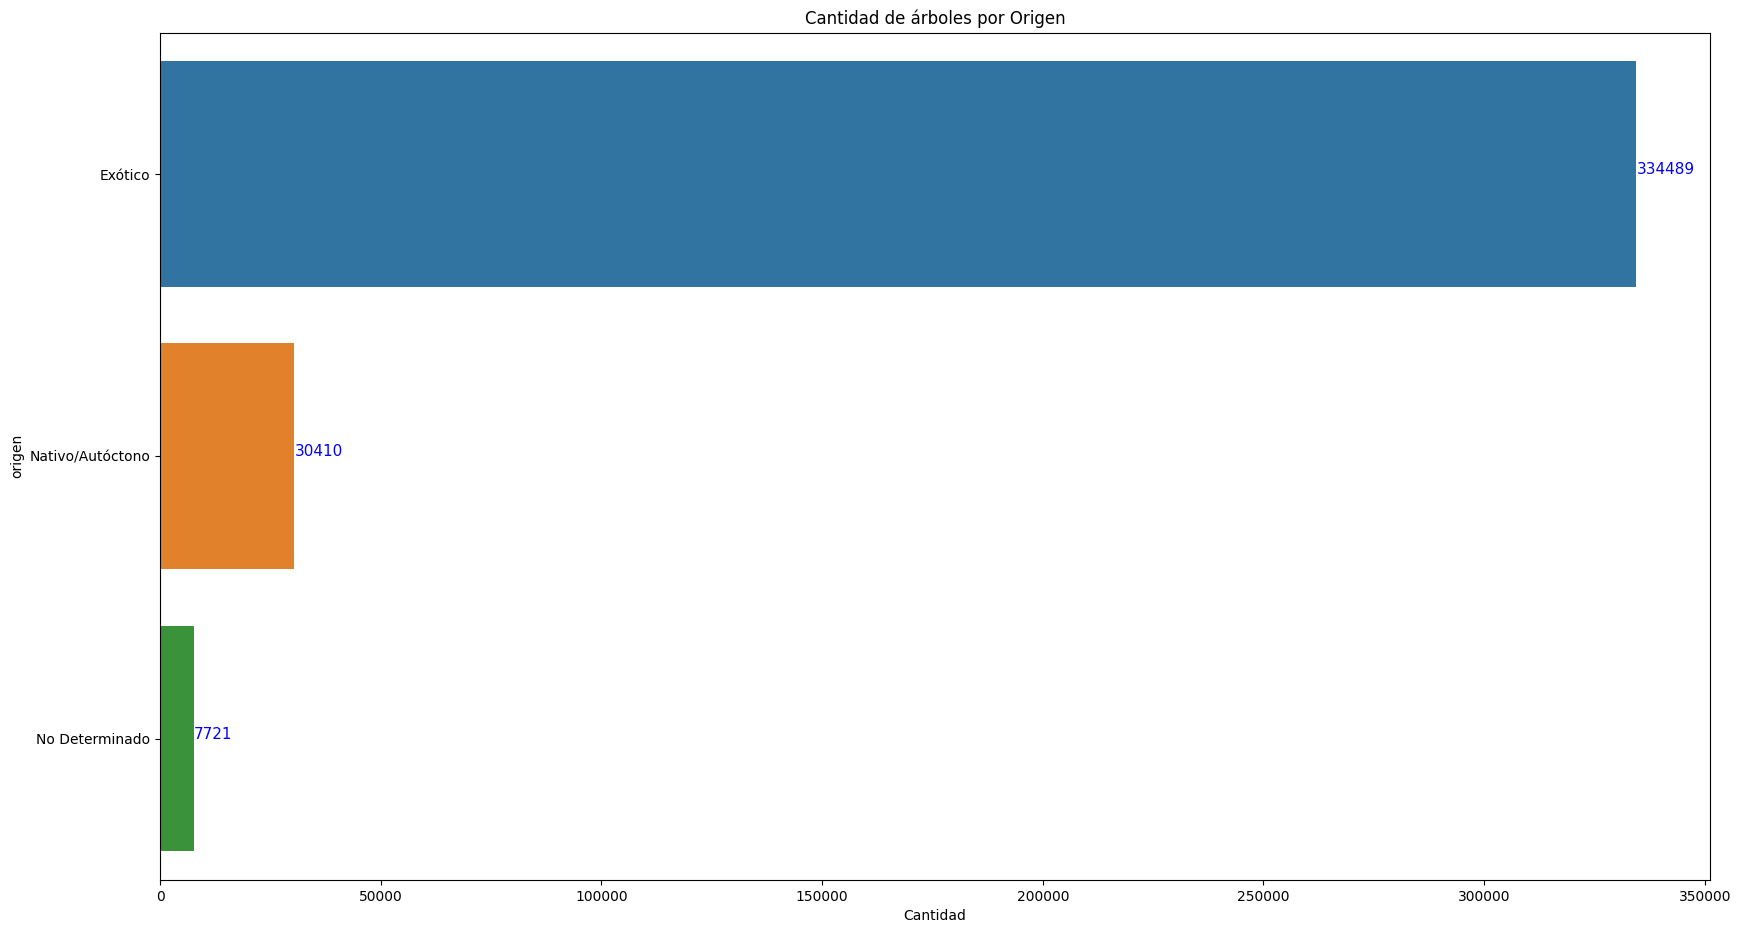

In [234]:
origen = data_arbolado.groupby(['origen']).size().to_frame(name = 'Cantidad').reset_index()
origen.sort_values(by='Cantidad', ascending=False, inplace=True)
origen.reset_index(drop=True, inplace=True)

fig, ax1 = plt.subplots()
fig.set_size_inches(20, 11)

grafico = sns.barplot(data = origen, y="origen", x="Cantidad",  ax=ax1, dodge=False)

for index, row in origen.iterrows():
    grafico.text(row.Cantidad, row.name, row.Cantidad, color='blue',fontsize=11)

grafico.set(xlabel='Cantidad', ylabel='origen', title='Cantidad de árboles por Origen')
plt.show()

# Algunos porcentajes relevantes

In [235]:
origenes = data_arbolado.origen.value_counts()
porcentaje_exoticos = origenes.Exótico*100/data_arbolado.shape[0]
porcentaje_nativos = origenes["Nativo/Autóctono"]*100/data_arbolado.shape[0]
porcentaje_no_determinados = origenes["No Determinado"]*100/data_arbolado.shape[0]
print(f"Exóticos: {round(porcentaje_exoticos)}%")
print(f"Nativos: {round(porcentaje_nativos)}%")
print(f"No determinados: {round(porcentaje_no_determinados)}%")

Exóticos: 90%
Nativos: 8%
No determinados: 2%


In [236]:
mombres_mas_comun = data_arbolado.nombre_com.value_counts()
porcentaje_fresno = mombres_mas_comun["Fresno americano"]*100/data_arbolado.shape[0]
print(f"Fresno Americano: {round(porcentaje_fresno)}%")

Fresno Americano: 38%
